# IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install xgboost

In [2]:
!pip install wordcloud

In [3]:
!pip install plotly

# Import key Python libraries

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
# from jupyterthemes import jtplot # Jupyter Notebook Theme
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.


# Import dataset

In [8]:
# Read the CSV file
car_df = pd.read_csv('cars_data.csv')
'''
# Load the top 5 instances
car_df.head()
# Load the bottom 5 instances 
car_df.tail(5)
'''
# random load 5 instances
car_df.sample(5)


Make                                Model    Type  Origin DriveTrain  \
331  Porsche  911 Carrera convertible 2dr (coupe)  Sports  Europe       Rear   
327  Pontiac                          Montana EWB   Sedan     USA        All   
229  Lincoln                     Navigator Luxury     SUV     USA        All   
343     Saab                             9-5 Aero   Wagon  Europe      Front   
277  Mercury                          Mountaineer     SUV     USA      Front   

        MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
331  $79,165  $69,229         3.6        6.0         315        18   
327  $31,370  $28,454         3.4        6.0         185        18   
229  $52,775  $46,360         5.4        8.0         300        13   
343  $40,845  $38,376         2.3        4.0         250        19   
277  $29,995  $27,317         4.0        6.0         210        16   

     MPG_Highway  Weight  Wheelbase  Length  
331           26    3135         93     175  
327           24    4431        121     201  
229           18    5969        119     206  
343           29    3620        106     190  
277           21    4374        114     190

In [9]:
# Display the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [10]:
# Check the shape of the dataframe
print('dataframe shape: ',car_df.shape)

dataframe shape:  (428, 15)


# Data preparation

In [11]:
# Check if any missing values are present in the dataframe
print('Missing data informations: ')
car_df.isnull().sum()

Missing data informations: 


Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [12]:
# only "Cylinders" has 2 missing values
# The missing data volume can be ignored compared to the total data volume.
car_df = car_df.dropna()

In [13]:
# Recheck missing data bythe summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
Make           426 non-null object
Model          426 non-null object
Type           426 non-null object
Origin         426 non-null object
DriveTrain     426 non-null object
MSRP           426 non-null object
Invoice        426 non-null object
EngineSize     426 non-null float64
Cylinders      426 non-null float64
Horsepower     426 non-null int64
MPG_City       426 non-null int64
MPG_Highway    426 non-null int64
Weight         426 non-null int64
Wheelbase      426 non-null int64
Length         426 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [14]:
# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns
car_df["MSRP"] = car_df["MSRP"].str.replace("$", "")
car_df["MSRP"] = car_df["MSRP"].str.replace(",", "")
car_df["MSRP"] = car_df["MSRP"].astype(int)

In [16]:
# recheck "MSRP"
car_df["MSRP"].head()

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: int32

In [17]:
car_df['Invoice'] = car_df['Invoice'].str.replace('$','')
car_df['Invoice'] = car_df['Invoice'].str.replace(',','')
car_df['Invoice'] = car_df['Invoice'].astype(int)

In [18]:
# Let's view the updated MSRP and Invoice Columns
print(car_df[['MSRP','Invoice']].tail())

      MSRP  Invoice
423  40565    38203
424  42565    40083
425  45210    42573
426  26135    24641
427  35145    33112


In [19]:
# Display the updated summary of the dataframe
car_df.describe()

MSRP        Invoice  EngineSize   Cylinders  Horsepower  \
count     426.000000     426.000000  426.000000  426.000000  426.000000   
mean    32804.549296   30040.654930    3.205634    5.807512  215.877934   
std     19472.460825   17679.430122    1.103520    1.558443   71.991040   
min     10280.000000    9875.000000    1.400000    3.000000   73.000000   
25%     20324.750000   18836.000000    2.400000    4.000000  165.000000   
50%     27807.500000   25521.500000    3.000000    6.000000  210.000000   
75%     39225.000000   35754.750000    3.900000    6.000000  255.000000   
max    192465.000000  173560.000000    8.300000   12.000000  500.000000   

         MPG_City  MPG_Highway       Weight   Wheelbase      Length  
count  426.000000   426.000000   426.000000  426.000000  426.000000  
mean    20.070423    26.854460  3580.474178  108.164319  186.420188  
std      5.248616     5.752335   759.870073    8.330030   14.366611  
min     10.000000    12.000000  1850.000000   89.000000  143.000000  
25%     17.000000    24.000000  3111.250000  103.000000  178.000000  
50%     19.000000    26.000000  3476.000000  107.000000  187.000000  
75%     21.750000    29.000000  3979.250000  112.000000  194.000000  
max     60.000000    66.000000  7190.000000  144.000000  238.000000

# DATA VISUALIZATION 
* scatterplots for joint relationships 
* heatmap for correlation 
* and histograms for univariate distributions

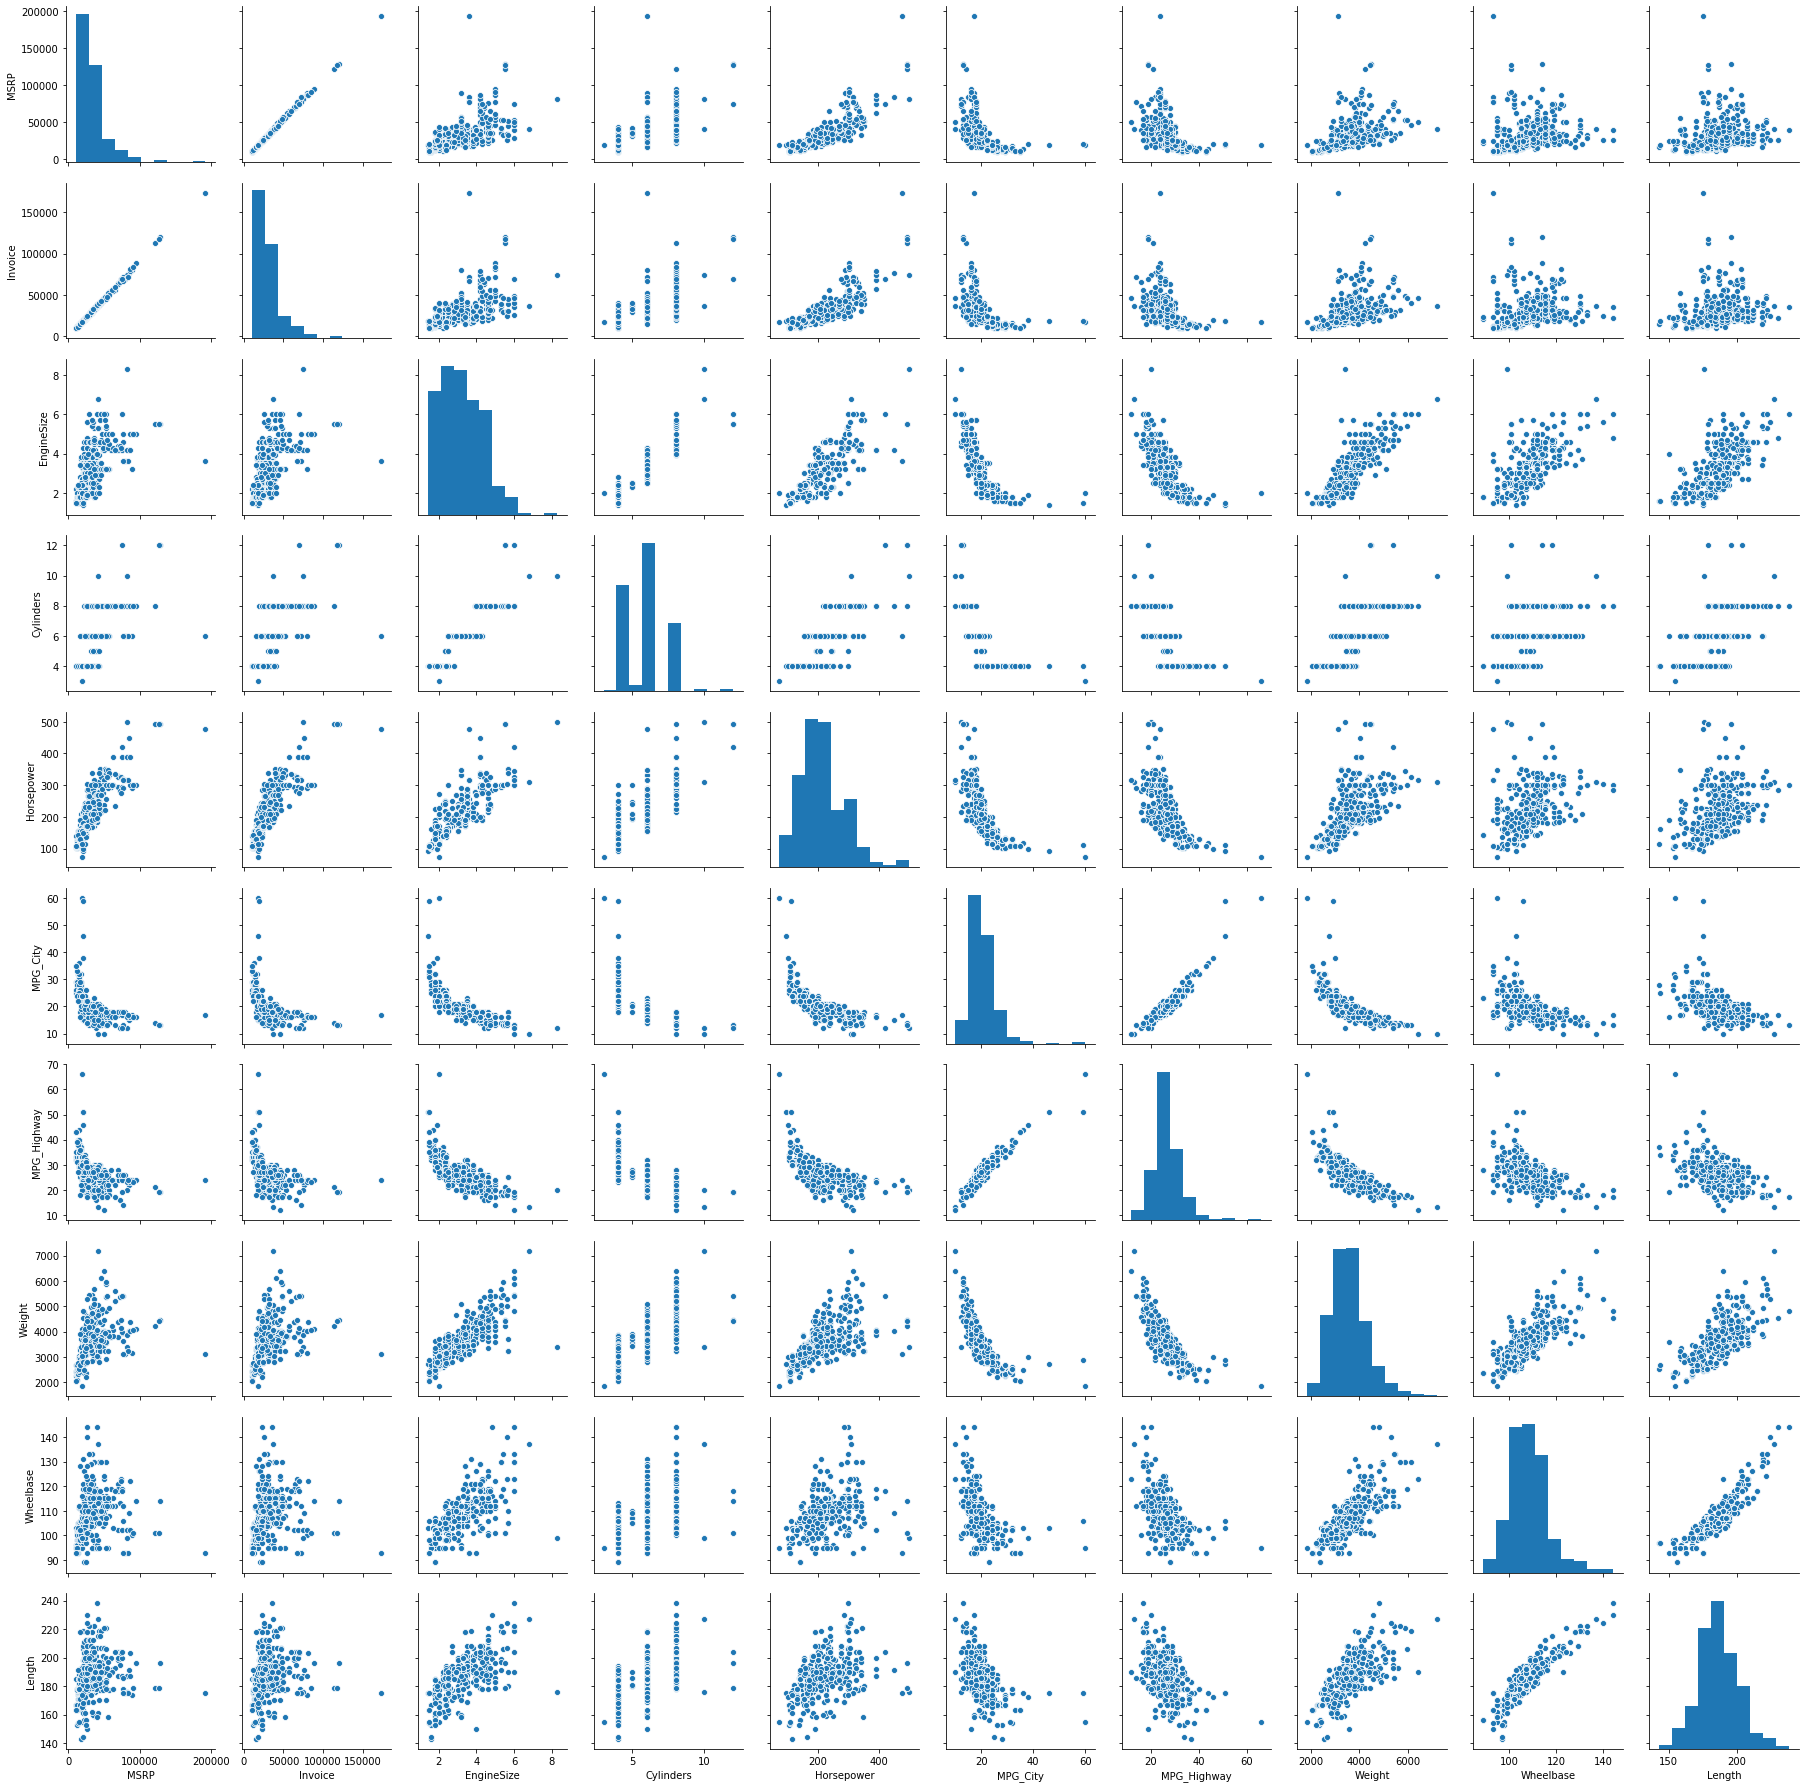

In [20]:
# scatterplots 
sns.pairplot(data = car_df)

In [39]:
# Obtain the correlation matrix
car_df.corr()

MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000  0.999132    0.573238   0.649742    0.827296 -0.475916   
Invoice      0.999132  1.000000    0.566019   0.645226    0.824079 -0.471304   
EngineSize   0.573238  0.566019    1.000000   0.908002    0.793250 -0.717860   
Cylinders    0.649742  0.645226    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.827296  0.824079    0.793250   0.810341    1.000000 -0.677034   
MPG_City    -0.475916 -0.471304   -0.717860  -0.684402   -0.677034  1.000000   
MPG_Highway -0.440523 -0.435452   -0.725901  -0.676100   -0.647425  0.940993   
Weight       0.447987  0.441916    0.808707   0.742209    0.631758 -0.740418   
Wheelbase    0.151665  0.148003    0.638947   0.546730    0.387561 -0.508029   
Length       0.171060  0.165645    0.636015   0.547783    0.382386 -0.504184   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.440523  0.447987   0.151665  0.171060  
Invoice        -0.435452  0.441916   0.148003  0.165645  
EngineSize     -0.725901  0.808707   0.638947  0.636015  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647425  0.631758   0.387561  0.382386  
MPG_City        0.940993 -0.740418  -0.508029 -0.504184  
MPG_Highway     1.000000 -0.793615  -0.525457 -0.468756  
Weight         -0.793615  1.000000   0.760857  0.689168  
Wheelbase      -0.525457  0.760857   1.000000  0.889838  
Length         -0.468756  0.689168   0.889838  1.000000

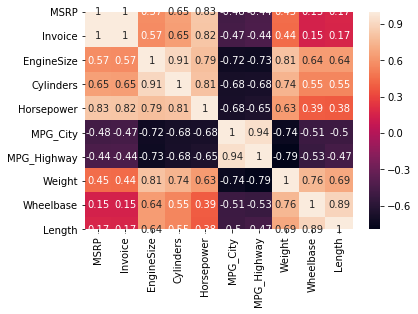

In [40]:
sns.heatmap(car_df.corr(),annot = True)

In [21]:
# Let's view single various makes of the cars
car_df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [22]:
fig = px.histogram(car_df, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["maroon"])
                  
fig.show()

In [23]:
# Let's view various types of the cars
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [24]:
fig = px.histogram(car_df, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["blue"])
                  
fig.show()

In [25]:
# Let's plot the location
car_df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [26]:
fig = px.histogram(car_df, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["brown"])
                  
fig.show()

In [27]:
# Let's view the drivetrain of the cars
car_df.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [28]:
fig = px.histogram(car_df, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["BLACK"])
                  
fig.show()

In [29]:
# Plot the make of the car and its location
fig = px.histogram(car_df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

MINI CHALLENGE #3:

- Plot the plotly histogram of Make and Type of the car
- Find out which manufacturer has high number of Sports type 
- Find out which manufacturers has Hybrid

In [ ]:
# Plot the Make and Type of the car
fig = px.histogram(car_df, x= 'Make', color = 'Type', labels = {"Make":'Manufacturer'},
                  title = "Make of the car Vs Type")
fig.show()

From the plot, one could find out a lot of informations, such as:

which manufacturer has high number of Sports type or

which manufacturers has Hybrid

Also using groupby can give us the same results

In [30]:
c2 = car_df.groupby(['Make','Type']).count()['MSRP']
print("the manufacturer ranking of Type - Sports:")
c2.iloc[c2.index.get_level_values('Type')=='Sports'].sort_values(ascending = False)

the manufacturer ranking of Type - Sports:


Make           Type  
Porsche        Sports    6
Mercedes-Benz  Sports    5
Audi           Sports    4
BMW            Sports    4
Jaguar         Sports    4
Mitsubishi     Sports    3
Ford           Sports    3
Toyota         Sports    2
Nissan         Sports    2
Mazda          Sports    2
Subaru         Sports    2
Chevrolet      Sports    2
Chrysler       Sports    1
Cadillac       Sports    1
Hyundai        Sports    1
Dodge          Sports    1
Honda          Sports    1
Lexus          Sports    1
Pontiac        Sports    1
Acura          Sports    1
Name: MSRP, dtype: int64

In [31]:
print("the manufacturer ranking of Type - Hybrid:")
c2.iloc[c2.index.get_level_values('Type')=='Hybrid'].sort_values(ascending = False)

the manufacturer ranking of Type - Hybrid:


Make    Type  
Honda   Hybrid    2
Toyota  Hybrid    1
Name: MSRP, dtype: int64

# DATA VISUALIZATION - WORDCLOUD

In [32]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS 

Wordcloud can be used on any text data to present a text frequence
such as one can use Wordcloud to show which topics are popular 

In [33]:
text = car_df.Model.values

In [34]:
# stopwords are some meanless words in the analysis such as 'a', 'the', 
# one can build his own stopword list depending on situation
stopwords = set(STOPWORDS)

In [35]:
wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))          

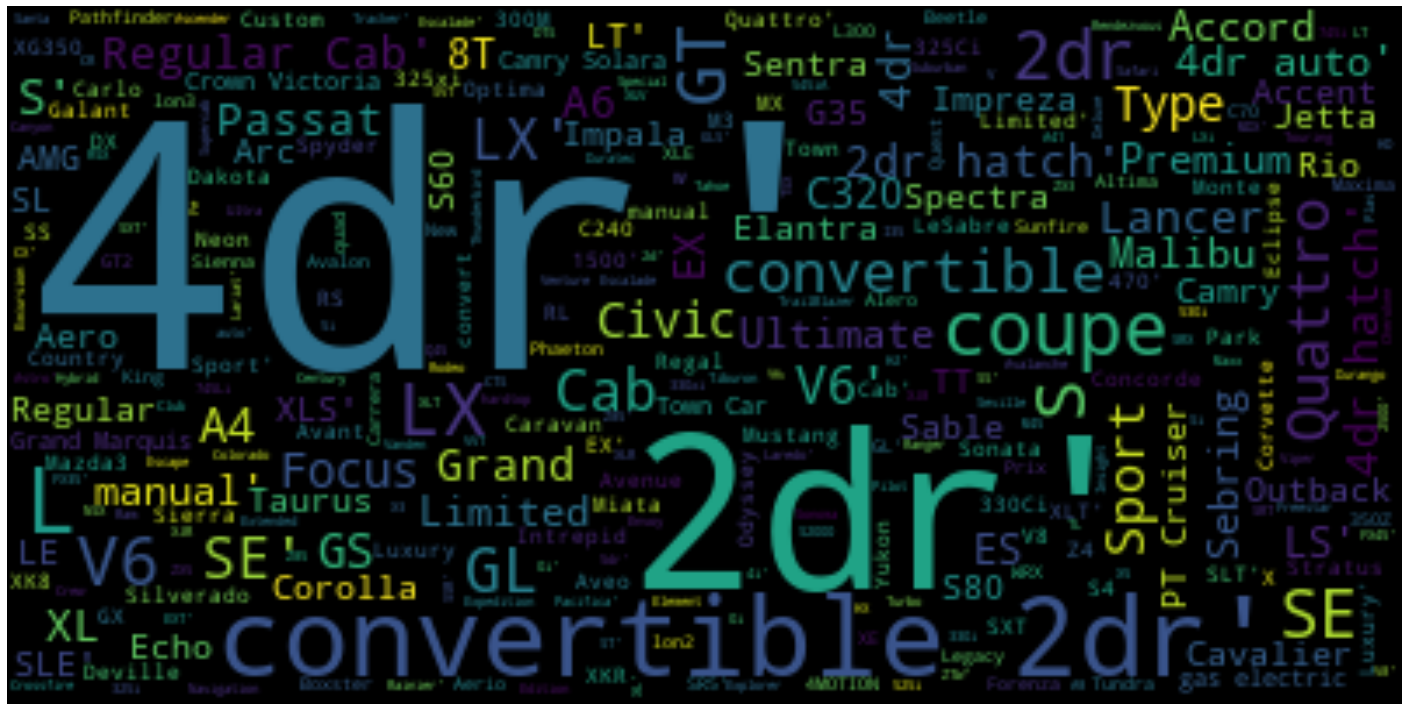

In [36]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

# PREPARE THE DATA BEFORE MODEL TRAINING

In [41]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
df_dum = pd.get_dummies(car_df, columns=['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])

In [42]:
df_dum.head()

MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0  36945    33337         3.5        6.0         265        17           23   
1  23820    21761         2.0        4.0         200        24           31   
2  26990    24647         2.4        4.0         200        22           29   
3  33195    30299         3.2        6.0         270        20           28   
4  43755    39014         3.5        6.0         225        18           24   

   Weight  Wheelbase  Length  ...  Type_Sedan  Type_Sports  Type_Truck  \
0    4451        106     189  ...           0            0           0   
1    2778        101     172  ...           1            0           0   
2    3230        105     183  ...           1            0           0   
3    3575        108     186  ...           1            0           0   
4    3880        115     197  ...           1            0           0   

   Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0           0            1              0           0               1   
1           0            1              0           0               0   
2           0            1              0           0               0   
3           0            1              0           0               0   
4           0            1              0           0               0   

   DriveTrain_Front  DriveTrain_Rear  
0                 0                0  
1                 1                0  
2                 1                0  
3                 1                0  
4                 1                0  

[5 rows x 483 columns]

In [43]:
# Invoice feature does not contribute to car price prediction 
df_data = df_dum.drop(['Invoice'], axis = 1)

In [44]:
# Feeding input features to X and output (MSRP) to y
X = df_data.drop("MSRP", axis = 1)
y = df_data["MSRP"]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=20)

In [46]:
X_train.shape

(340, 481)

In [47]:
X_test.shape

(86, 481)

# TRAIN AND EVALUATE A MULTIPLE LINEAR REGRESSION

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [49]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.7699371436717627

# TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS 

In [51]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [52]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.7738173595427302

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
RandomForest_model = RandomForestRegressor(n_estimators=5,max_depth=5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [55]:
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.8634347866927984

# TRAIN AN XG-BOOST REGRESSOR MODEL

In [56]:
from xgboost import XGBRegressor

In [57]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [58]:
accuracy_XGBoost = model.score(X_test, y_test)
accuracy_XGBoost

0.8756177449687349

# COMPARE MODELS AND CALCULATE REGRESSION KPIs

[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'Linear Regression Model')]

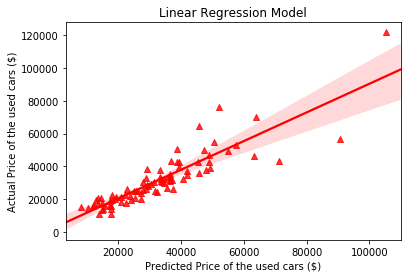

In [59]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [60]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 7896.269 
MSE = 62351063.38942641 
MAE = 5358.006584589403 
R2 = 0.7699371436717626


[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'Random Forest Regression Model')]

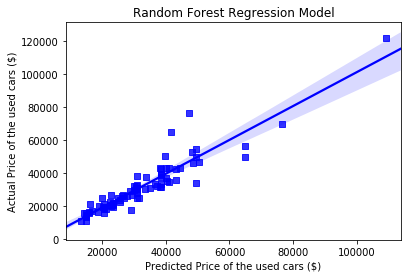

In [61]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(y_predict_RandomForest, y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [62]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 6083.713 
MSE = 37011564.6115394 
MAE = 3844.8924743754383 
R2 = 0.8634347866927984


[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'XGBoost Model')]

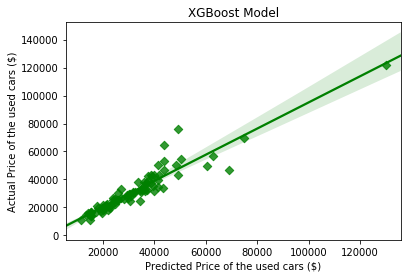

In [63]:
y_predict_XGBoost = model.predict(X_test)

fig = sns.regplot(y_predict_XGBoost, y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [64]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 5806.012 
MSE = 33709769.546238326 
MAE = 3590.476312681686 
R2 = 0.8756177449687348


From the ablove results, it is clearly shown that XGBoost model scores 94% accuracy which outperforms Linear Regression and Random Forest Regression models